# WORD2VEC

## Working with Word2Vec with Gensim


### Objectives
- Visualize word vectorization
- Prepare gensim environment
- Fit word2vec models
- Interpret latent variables/vectors
- Find similar words and word pairs
- Use externally-trained matrices of latent features

We have been working with a number of techniques and tools that help us navigate the world of NLP. For example, we have CountVectorizer:

In [54]:
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import matplotlib.pyplot as plt

text = ['That is should come to this!', 'This above all: to thine own self be true.', 'Something is rotten in the state of Denmark.']
vectorizer = CountVectorizer(ngram_range=(1,2))

vectorizer.fit(text)
x = vectorizer.transform(text)
x_back = x.toarray()

pd.DataFrame(x_back, columns=vectorizer.get_feature_names())

,above,above all,all,all to,be,be true,come,come to,denmark,in,...,the,the state,thine,thine own,this,this above,to,to thine,to this,true
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,1,1,1,1,1,0,0,0,0,...,0,0,1,1,1,1,1,1,0,1
2,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0


>An Adverse Traits abou the Bag of Words model: Word Context & semantic meaning does not play a role.


>But then came Word2Vec!

>We will see that with Word2Vec, context does play a role and it can decipher relationships between words.

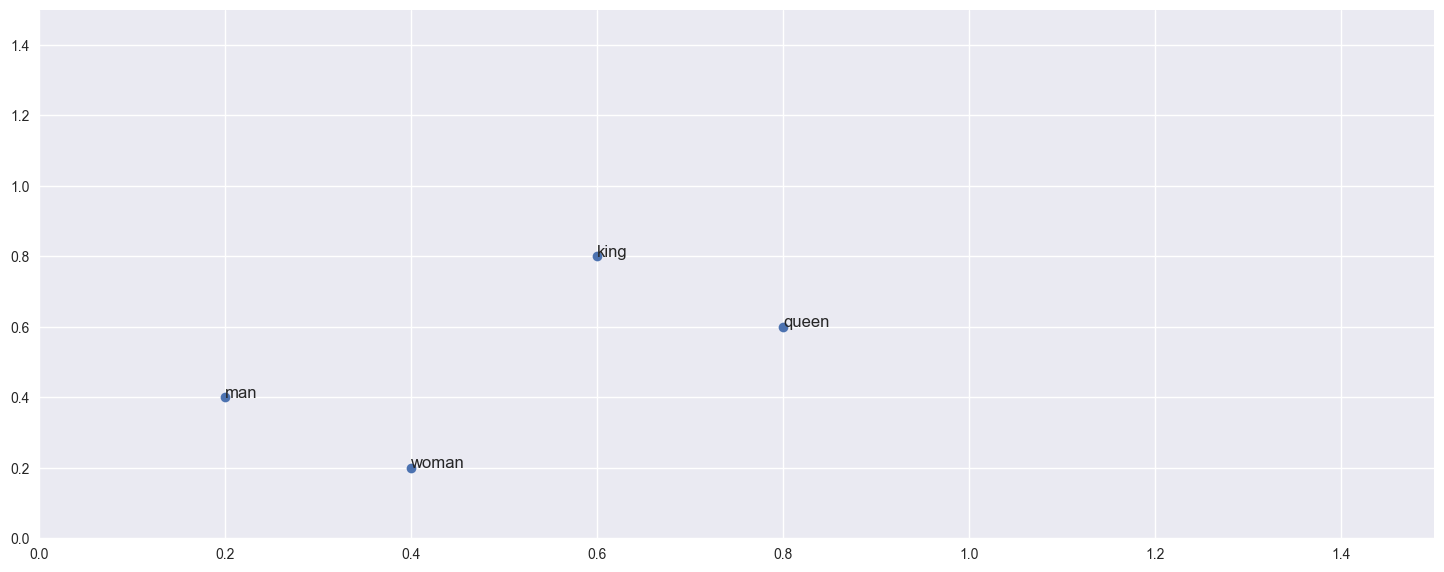

In [55]:
import seaborn as sb  
import numpy as np

words = ['king','queen', 'man', 'woman']  


vectors = np.array([[0.6,   0.8], 
                    [0.8, 0.6],
                   [.2,.4],[.4,.2]]
                 ) 

sb.plt.plot(vectors[:,0], vectors[:,1], 'o')  
sb.plt.xlim(0, 1.5)  
sb.plt.ylim(0, 1.5)  
for word, x, y in zip(words, vectors[:,0], vectors[:,1]):  
    sb.plt.annotate(word, (x, y), size=12)

## First things first :

**1) Install Gensim: **

pip install gensim

**  2)  Make sure cython is installed ? **

cython -V

(if no cython):

pip install cython


** 3) test (Run the sample code in following cell) **


In [56]:
import gensim
documents = ["Will this work?  I'm not sure.  If not go to step #4 (above)"]
texts = [[word for word in document.lower().split()]
         for document in documents]


print (texts)
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=4,sg=1)

[['will', 'this', 'work?', "i'm", 'not', 'sure.', 'if', 'not', 'go', 'to', 'step', '#4', '(above)']]



**4) If you see the following error : "UserWarning: C extension not loaded for Word2Vec"**


Do the following:

1.  pip uninstall gensim
2.  pip uninstall scipy 

3. pip install --no-cache-dir scipy==0.15.1
4. pip install --no-cache-dir gensim==0.12.1


**Refer to the following:** https://groups.google.com/forum/#!topic/gensim/isBqIhrw9mk

In [57]:
# A 'Gensim' example: 

documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

## Word2Vec (In a Word..)

### Preprocessing

1. Tokenization   
2. Remove stop words    
3. Convert to lowercase     
4. Others: stemming.. 

In [58]:
# The type of input that Word2Vec is looking for.. 
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

print (texts)

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'], ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'management', 'system'], ['system', 'human', 'system', 'engineering', 'testing', 'eps'], ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'], ['generation', 'random', 'binary', 'unordered', 'trees'], ['intersection', 'graph', 'paths', 'trees'], ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'], ['graph', 'minors', 'survey']]


###  2: Word Representation

Learn a continuous representation of words.
Each word (w) is associated with it's own word vector

In [59]:
import gensim  # using skip-gram
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=2,sg=1)

[See Wiki on arguments](https://en.wikipedia.org/wiki/Word2vec)

A Word2vec model can be trained with hierarchical softmax and/or negative sampling. To approximate the conditional log-likelihood a model seeks to maximize, the hierarchical softmax method uses a Huffman tree to reduce calculation. The negative sampling method, on the other hand, approaches the maximization problem by minimizing the log-likelihood of sampled negative instances. According to the authors, hierarchical softmax works better for infrequent words while negative sampling works better for frequent words and better with low dimensional vectors. As training epochs increase, hierarchical softmax stops being useful.

The size of the context window determines how many words before and after a given word would be included as context words of the given word. The recommended value is 10 for skip-gram and 5 for CBOW.

In [60]:
# take a look at vocab
list(model.wv.vocab.items())[:10]

[('well', <gensim.models.keyedvectors.Vocab at 0x127bf2ba8>),
 ('perceived', <gensim.models.keyedvectors.Vocab at 0x1287ee978>),
 ('system', <gensim.models.keyedvectors.Vocab at 0x127bf2d68>),
 ('trees', <gensim.models.keyedvectors.Vocab at 0x127bf2dd8>),
 ('error', <gensim.models.keyedvectors.Vocab at 0x127bf2e10>),
 ('lab', <gensim.models.keyedvectors.Vocab at 0x1287ee1d0>),
 ('machine', <gensim.models.keyedvectors.Vocab at 0x1287ee198>),
 ('relation', <gensim.models.keyedvectors.Vocab at 0x10f885438>),
 ('applications', <gensim.models.keyedvectors.Vocab at 0x125ceeef0>),
 ('abc', <gensim.models.keyedvectors.Vocab at 0x10f849198>)]

In [73]:
#  and Voila !    We have our word vector 
print (model['trees'])

[-0.73946762 -0.17495961  0.33782801  0.76875526  0.49992499  0.38004577
 -0.34073955  1.45962405  0.52247393  0.21265365 -0.10645271  0.06073939
 -0.27849618 -0.65469068  0.08609565  0.85587853 -0.92698127  0.34195983
  0.05602047  0.22420406  0.47410661 -0.29696095  0.47413492 -0.26046187
  0.24190915 -0.26980206  0.11497423  0.81226075 -0.0763878   0.08353194
  0.18382947  0.07651192  0.55292231  0.75504953 -0.41511846 -0.34886026
  0.17120236  0.87804216 -0.76258522  0.00333688 -0.25096366  0.39037016
 -0.96215445 -0.34791714  0.57789099 -0.40546888  0.16862515  0.7943517
 -0.31151801 -0.1382712  -0.24811046 -0.43694097 -0.00690033  1.02348304
 -0.44285059 -0.44945988 -0.23847409 -0.53583008  0.25040644  0.36855897
  0.85729396 -0.12049456  0.39440238 -0.29755473  0.10577723  0.41572234
  0.20245174  0.23647231 -0.4640173  -0.58583987 -0.89287508  0.33920032
  1.00455976 -0.12090312  0.37228939  0.77031082 -0.7682938  -0.66676378
  0.06302413  0.4472433   0.66351402  0.115701    0.

###  What do we have? Word Embeddings 

**A word embedding W : words → ℝn **

The output above is the result of 'word' projections in a latent space
of N dimensions, (N ~ size of NN layer we chose).     
Our float values above represent the coordinates for the word 'computer' in our 100-dimensional space!

Our high dimensional vectors stand in place for words.    
Note, that these dimensions are encoding 'latent' properties for 'computer' (such that 'queen' will be geometrically closer to 'king' than it would to be to (let's say) 'computer'. 

Word Embeddings are useful because:

1.  We can measure the semantic similarity between two words
2.  We can use these word vectors as features for various NLP supervised learning tasks (such as classification, sentiment analysis). 

### 3:  Skip-Gram Methods &  CBOW Methods : 

#### Skip-Gram example sentence:

>"We are on the cusp of deep learning for the masses"

For Context Window = 2:

*We could get the following training examples: (Where target word is in bold) *


**We** are on 

We **are** on the

We are **on** the cusp


#### What's happening underneath the hood? :
We have input of skip-gram is a single word (Wi) **'learning'**, we will determine the probability of seeing the words (Wo) : 'of','deep', 'for','the'.

1. Transform our vobabulary into a 'bag of indices'

2. One-hot encode (input vectors) 

3. Randomly initialize the Weight Vectors

4. Get dot product: (Input vector.InputWeightMatrix) ~ (this is just the weight vector for 'learning')

5. Get dot product:  ('learning' weight vector).(Output Weight Matrix) 

6. Calculate Softmax probabilities:
    - What is the probability of 'seeing' the word 'deep' given that we've seen the word 'learning'?  -- >  Using SGD together with softmax regression, we will maximize the probability for 'deep' 
    - P(Wo|Wi) = (exp(Wi.Wo)/ sum(exp(Wi.Woj)   (sum~ sum of all Woj for all j in Vocabulary)

7. As always, we update our Weight matrix to reduce our errors:
    - Wi=Wi-a*ej*Wo

8. Repeat...

 
<img src='img/skip_gram.png'/>


### CBOW: 


CBOW: very similiar model with the inputs & outputs reversed.  The input layer consists of our word window 

<img src='img/CBOW.png'/>



### Let's work with a corpus from NLTK

In [62]:
# WARNING : Use Scroll bar with NLTK download... or else? !?! 
import nltk
#nltk.download()

In [63]:
# Build corpus from 
import os
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop+=['?','!','.',',',':',';']

#creating our iterator


# An Illustration.. 

import os

class MySentences(object):
    # a memory-friendly way to load a large corpora
     def __init__(self, dirname):
            self.dirname = dirname
 
     def __iter__(self):
        # iterate through all file names in our directory
         for fname in os.listdir(self.dirname):
                for line in open(os.path.join(self.dirname, fname), encoding="ISO-8859-1"):
                    word=line.lower().split()
                    if word not in stop:
                        yield word

sentences = MySentences('/Users/jb/nltk_data/corpora/gutenberg') 
model = gensim.models.Word2Vec(sentences,size=100,min_count=3,workers=4)

In [74]:
model.most_similar('king' ,topn=8)

[('moses', 0.8435226678848267),
 ('david', 0.8316305875778198),
 ('jesus', 0.7928542494773865),
 ('son', 0.7908626794815063),
 ('joshua', 0.7713443636894226),
 ('congregation', 0.7455540895462036),
 ('saul', 0.7429255247116089),
 ('children', 0.742459237575531)]

In [83]:
# Similarity

model.similarity('woman','man')

0.72160210851106377

In [86]:
# Compute cosine_similarity

model.n_similarity(['woman', 'girl'], ['man', 'rabbit'])

0.73576477229761128

In [93]:
model.doesnt_match("bull soldier cow warrior".split())

'bull'


### If you want to refine your model, you'll need more data:
#### Let's work with Google's pre-trained [Word2Vect Model](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

In [68]:
import os

# Setup nltk corpora path and Google Word2Vec location
google_vec_file = '/Users/jb/Downloads/GoogleNews-vectors-negative300.bin'

In [69]:
model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jb/Downloads/GoogleNews-vectors-negative300.bin'

In [ ]:
model.most_similar('king' ,topn=4)

In [ ]:
model.most_similar('president' ,topn=4)

In [ ]:
model.n_similarity(['king', 'man'], ['queen', 'woman'])

Other very cool methods!:      


Doc2Vec extends the word2vec algorithm to larger blocks of texts (paragraphs, documents, articles):    
https://radimrehurek.com/gensim/models/doc2vec.html

http://learningaboutdata.blogspot.com/2014/06/plotting-word-embedding-using-tsne-with.html

https://districtdatalabs.silvrback.com/modern-methods-for-sentiment-analysis

https://radimrehurek.com/gensim/models/word2vec.html

###   Some things to keep in Mind when using Word2Vec:

Word2vec requires a lot of data to train.

As we've illustrated, you can download pretrained vectors. However, if you would need to train your own data 
you will need a lot of it!  (Think Millions of words) 
